In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import colors

In [2]:
mc = np.genfromtxt('mc.central/test.csv')
data = np.genfromtxt('data.central/data.csv')

In [12]:
# Global variables for plotting
weight_col_names = ['weight', 'lumi_weight', 'brf_correction_weight', 'cln_weight', 'llswb1_weight', 'llswb2_weight']

# Change these if necessary:
run = 0 # = 0 for all runs
nbins_default = 200 #'auto'
normed_flag = False
save_figures_flag = False

# Shouldn't have to change these:
golden = (1 + 5 ** 0.5) / 2
figwidth = 8
fsize = 12
color_names = [ '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#CC79A7', '#D55E00', '#0072B2' ]
alpha_val = 1.

In [22]:
def create_hist(var_name, data_range=None, 
                nbins=nbins_default, normed_flag=False, run=run,
                legend_loc=1, log_yaxis=False, save_figures=save_figures_flag):
    
    if var_name == 'logit_logre_signal_score':
        if data_range:
            data_var = [x for x in data[:,0] if x >= data_range[0] and x <= data_range[1]]
            mc_var = []
            mc_weights = []
            for i,x in enumerate(mc[:,0]):
                if x >= data_range[0] and x <= data_range[1]:
                    mc_var.append(x)
                    mc_weights.append(mc[i,2])
        else:
            data_var = data[:,0]
            mc_var = mc[:,0]
            mc_weights = mc[:,2]
    elif var_name == 'logit_logre_dstartau_score':
        if data_range:
            data_var = [x for x in data[:,1] if x >= data_range[0] and x <= data_range[1]]
            mc_var = []
            mc_weights = []
            for i,x in enumerate(mc[:,1]):
                if x >= data_range[0] and x <= data_range[1]:
                    mc_var.append(x)
                    mc_weights.append(mc[i,2])
        else:
            data_var = data[:,1]
            mc_var = mc[:,1]
            mc_weights = mc[:,2]
    
    
    # Define plot and figure
    fig = plt.figure(figsize=(figwidth*golden,figwidth))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    ax = fig.add_subplot(gs[0])
    
    # Plot data as points with error bars; save binning information
    data_counts, bin_edges = np.histogram(data_var, nbins, normed=normed_flag)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
    data_err = [x**0.5 for x in data_counts]
    ax.errorbar(bin_centers, data_counts, yerr=data_err, 
                fmt='.', mfc='black', mec='black', ecolor='black',# ms=4,
                label='Data')
    
    # Plot MC as a histogram
    mc_counts,_,_ = ax.hist(mc_var, normed=normed_flag, bins=bin_edges, 
                            weights=mc_weights, label='MC', 
                            color=color_names[0],  edgecolor = 'white', rwidth=1.)
    
    # Make plot look nice
    ax.legend(prop={'size':fsize}, loc=legend_loc)
    ax.set_xlabel(var_name, fontsize=fsize)
    ax.set_ylabel('Counts', fontsize=fsize)
    ax.tick_params(length=8, width=1, labelsize=fsize)
    if log_yaxis:
        ax.set_yscale('log')
    #ax.set_xlim(plot_xrange)
    
    # Add subplot for MC-data difference
    ax2 = fig.add_subplot(gs[1])
    diff_counts = [(x-y)/float(x) for x,y in zip(data_counts, mc_counts)]
    diff_err = [np.sqrt(y*(x+y)/x**3) for x,y in zip(data_counts, mc_counts)]
    ax2.errorbar(bin_centers, diff_counts, color='black',
                 yerr=diff_err, fmt='.')
    
    # Make it look nice
    ax2.set_xlabel(var_name, fontsize=fsize)
    ax2.set_ylabel('Data - MC / Data', fontsize=fsize)
    ax2.tick_params(length=8, width=1, labelsize=fsize-1)
    ax2.axhline(0, color='black')
    ax2.set_xlim(ax.get_xlim())
    ymin, ymax = ax2.get_ylim()
    ymin, ymax = -1.*max([abs(ymin), abs(ymax)]), max([abs(ymin), abs(ymax)])
    #ax2.set_ylim([ymin, ymax])
    ax2.set_ylim([-0.5, 0.5])
    
    if save_figures_flag:
        fig.savefig('{0}.pdf'.format(var_name), bbox_inches='tight')
    
    return fig

/nfs/home/jkim/Software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:62: RuntimeWarning: divide by zero encountered in double_scalars
/nfs/home/jkim/Software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:62: RuntimeWarning: invalid value encountered in double_scalars
/nfs/home/jkim/Software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/nfs/home/jkim/Software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in double_scalars


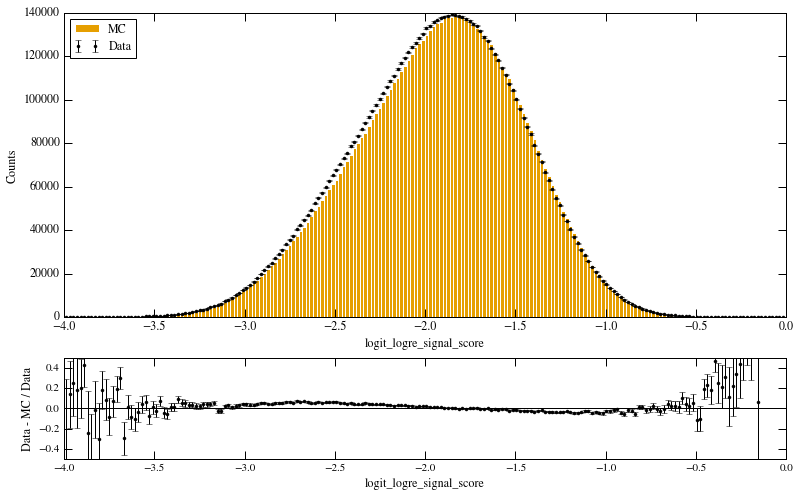

In [23]:
_ = create_hist('logit_logre_signal_score', data_range=[-4,0], legend_loc=2)

/nfs/home/jkim/Software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:62: RuntimeWarning: divide by zero encountered in double_scalars
/nfs/home/jkim/Software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:62: RuntimeWarning: invalid value encountered in double_scalars
/nfs/home/jkim/Software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/nfs/home/jkim/Software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in double_scalars


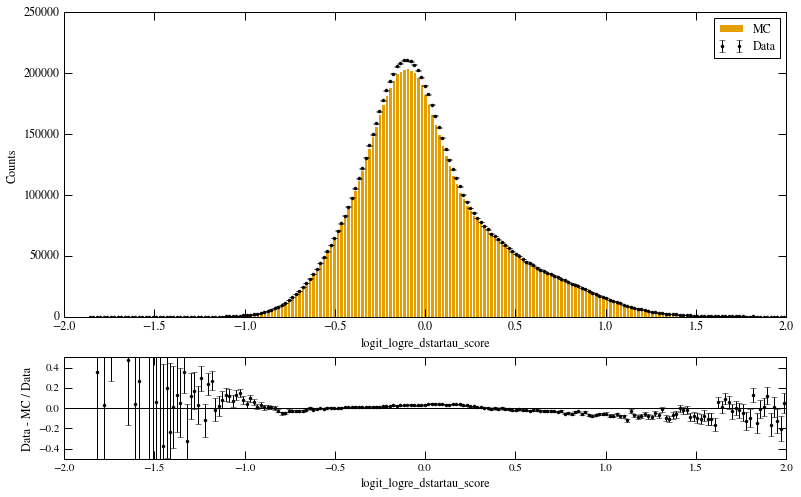

In [24]:
_ = create_hist('logit_logre_dstartau_score', data_range=[-2,2])